In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import interpolate

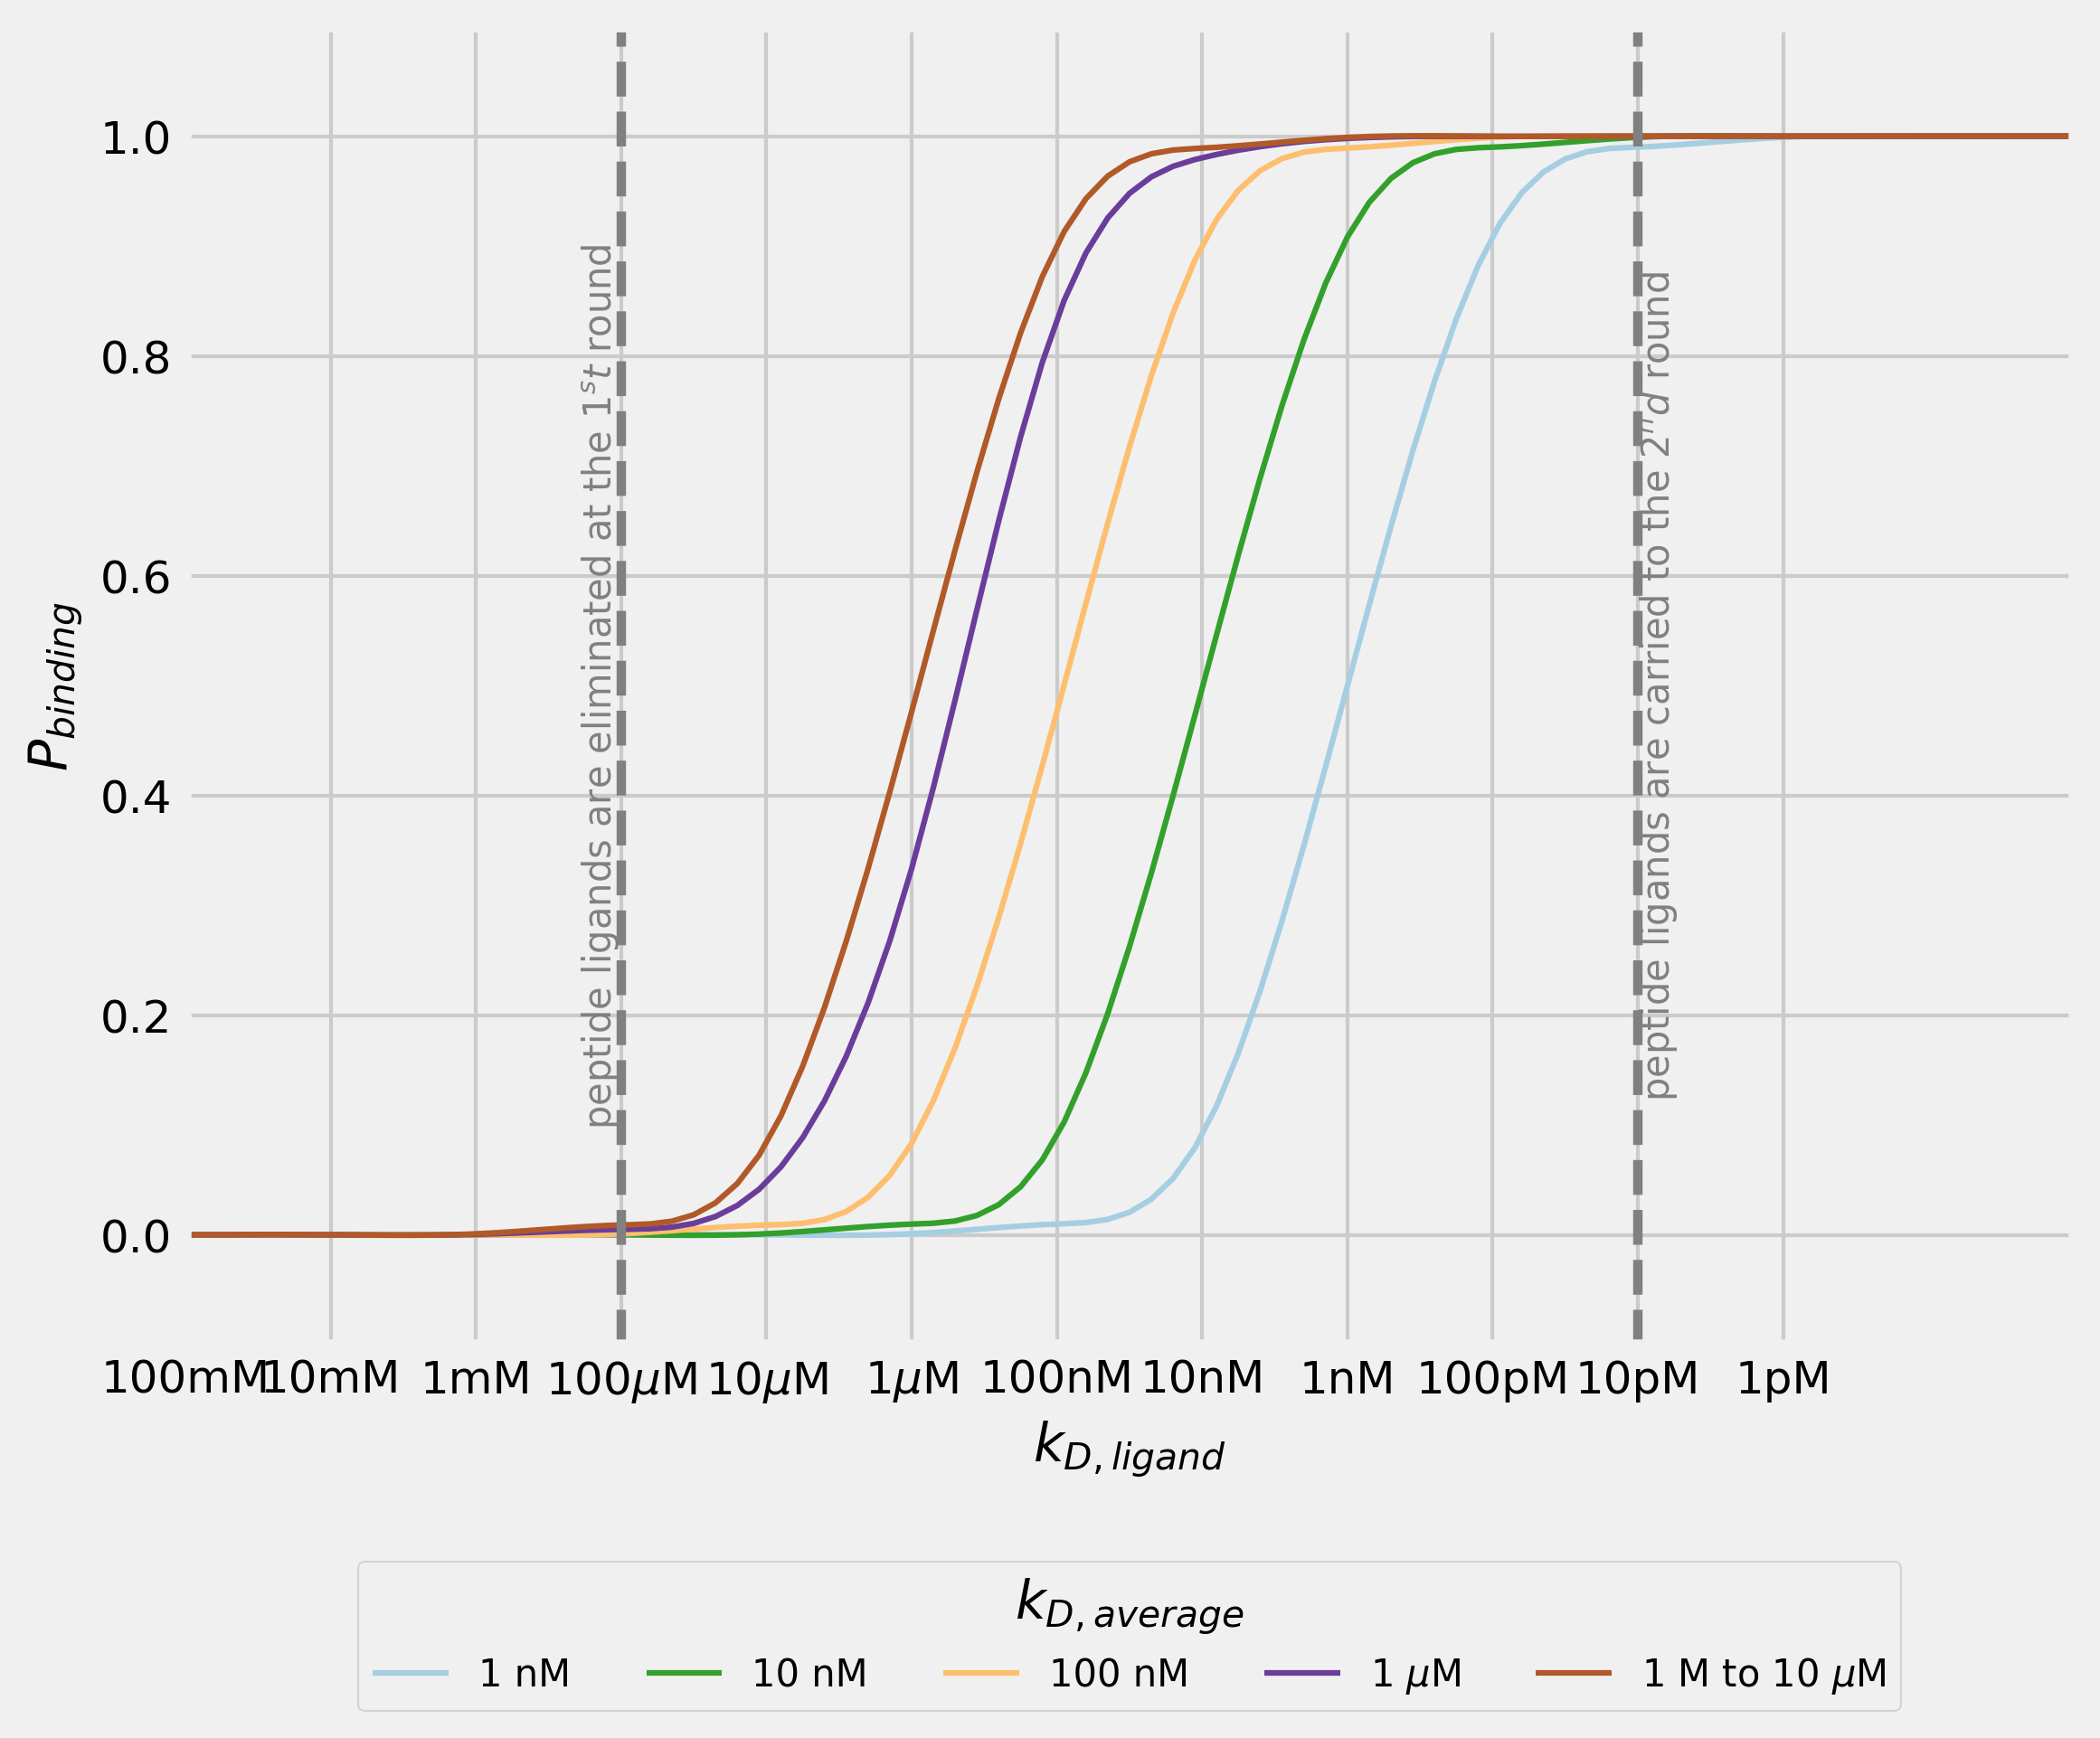

In [15]:
total_protein_conc = 10**(-6)
total_ligand_conc = 10**(-6)

# Create 'ggplot' style
plt.style.use('fivethirtyeight')
# Create a figure of size 8x6 inches, 500 dots per inch
fig, ax = plt.subplots(
            1, 1,
            figsize = (8, 6),
            dpi = 300)

# Map colours onto lines

c_norm = matplotlib.colors.Normalize(vmin = -9,
                                     vmax = -5)
scalar_map = matplotlib.cm.ScalarMappable(norm = c_norm,
                                         cmap = 'Paired')

for i in range(-9, -4):
#     print(i)
    mean_ligang_kd = 10**i
    p_protein_bound = (
        (total_ligand_conc / mean_ligang_kd)
        / (1 + (total_ligand_conc / mean_ligang_kd)))
    free_protein_conc_expected = total_protein_conc * (1 - p_protein_bound)
    Xs = []
    Ys = []    
    for j in range (-15, 1):
        ligand_kd = 10**j
        p_ligand_bound = (
            (free_protein_conc_expected / ligand_kd)
            / (1 + (free_protein_conc_expected / ligand_kd)))
        Xs += [-j]
        Ys += [p_ligand_bound]
        
    xs_reversed = list(reversed(Xs))
    ys_reversed = list(reversed(Ys))
        
    interpolation = interpolate.splrep(xs_reversed, ys_reversed, s = 0, k = 3)
    xs_new = np.linspace(0, 15, num = 101, endpoint = True)
    ys_new = interpolate.splev(xs_new, interpolation, der = 0)
    
    # Set the colour to line
    line_color = scalar_map.to_rgba(i)
        
    ax.plot(xs_new, ys_new,
             ls = '-',
             c = line_color,
             #mew = 0.1,
             #ms = 4.0,
             lw = 1.5,
             mec = '#191919')

    
ax.plot([4, 4], [-0.1, 1.1],
     color = 'gray',
     linewidth = 2.5,
     linestyle = "--")

ax.plot([11, 11], [-0.1, 1.1],
     color = 'gray',
     linewidth = 2.5,
     linestyle = "--")


ax.tick_params(labelsize = 12)
# Set x limits
ax.set_xlim(1.0, 14.0)
# Set x ticks
ax.set_xticks(np.arange(1, 13))
ax.set_xticklabels(
    ['100mM', '10mM', '1mM', '100$\mu$M',
     '10$\mu$M', '1$\mu$M', '100nM', '10nM',
     '1nM', '100pM', '10pM', '1pM', '100fM'],)

# Set y limits
ax.set_ylim(-0.1, 1.1)
# Set y ticks
# plt.yticks(np.linspace(-0, 1, 5, endpoint = True),
#           fontsize = 9)
# ax.set_yticks(np.arange(0, 1, 5))
    
ax.set_xlabel(
    '$k_{D,ligand}$',  #$_X$ makes subscript possible
    fontsize = 14)

ax.set_ylabel(
    '$P_{binding}$',
    fontsize = 14)

ax.text(
    4,
    0.5,
    'peptide ligands are eliminated at the 1$^st$ round',
    horizontalalignment = 'right',
    verticalalignment = 'center',
    rotation = 'vertical',
    color = "gray",
    #alpha = alpha,
    fontsize = 10,
    clip_on = True)

ax.text(
    11,
    0.5,
     'peptide ligands are carried to the 2$^nd$ round',
     horizontalalignment = 'left',
     verticalalignment = 'center',
     rotation = 'vertical',
     color = "gray",
     #alpha = alpha,
     fontsize = 10,
     clip_on = True)

legend_entries = ['1 nM', '10 nM', '100 nM', '1 $\mu$M', '1 M to 10 $\mu$M']
legend_title = '$k_{D,average}$'

ax.legend(
    legend_entries,
    title = legend_title,
    fontsize = 10,
    loc = 'upper center',
    bbox_to_anchor = (0.5, -0.15),
    fancybox = True,
    shadow = False,
    ncol = 5)
ax.get_legend().get_title().set_size('medium')

FileNamePNG = 'kds_and_binding_probability.png'


plt.show()
fig.savefig(FileNamePNG,
            bbox_inches = 'tight',
            dpi = 300)
plt.close()
    